## CartPole Luistelu

> **Ongelma**: Jos Peter haluaa paeta sudelta, hänen täytyy pystyä liikkumaan nopeammin kuin susi. Katsotaan, kuinka Peter voi oppia luistelemaan, erityisesti pitämään tasapainonsa, käyttämällä Q-Learning-menetelmää.

Ensiksi asennetaan gym ja tuodaan tarvittavat kirjastot:


In [1]:
#code block 1

## Luo cartpole-ympäristö


In [ ]:
#code block 2

Katsotaan, miten ympäristö toimii, suorittamalla lyhyt simulaatio 100 askeleen ajan.


In [ ]:
#code block 3

Simulaation aikana meidän täytyy saada havaintoja päättääksemme, miten toimia. Itse asiassa `step`-funktio palauttaa meille nykyiset havainnot, palkintofunktion ja `done`-lipun, joka ilmaisee, onko simulaation jatkamisessa järkeä vai ei:


In [ ]:
#code block 4

Voimme saada näiden lukujen minimi- ja maksimiarvon:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Tutkitaan myös muita diskretointimenetelmiä käyttämällä binnejä:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Juostaan nyt lyhyt simulaatio ja tarkkaillaan näitä diskreettejä ympäristöarvoja.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-taulukon rakenne


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


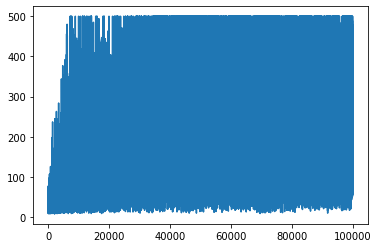

In [20]:
plt.plot(rewards)

Tästä kaaviosta ei voida päätellä mitään, koska stokastisen koulutusprosessin luonteen vuoksi koulutussessioiden pituus vaihtelee suuresti. Jotta tämä kaavio olisi ymmärrettävämpi, voimme laskea **liukuvan keskiarvon** kokeiden sarjan yli, sanotaan vaikka 100. Tämä voidaan tehdä kätevästi käyttämällä `np.convolve`:


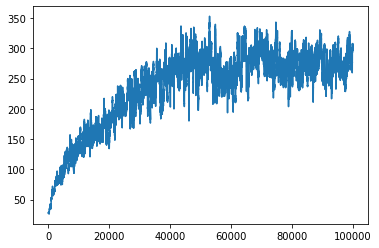

In [22]:
#code block 12

## Hyperparametrien vaihtelu ja tulosten tarkastelu käytännössä

Nyt olisi mielenkiintoista nähdä, miten koulutettu malli toimii. Käynnistetään simulaatio, ja käytämme samaa toimintojen valintastrategiaa kuin koulutuksen aikana: näytteenotto Q-taulukon todennäköisyysjakauman mukaan:


In [23]:
# code block 13

## Tallentaminen animoituun GIF-tiedostoon

Jos haluat tehdä vaikutuksen ystäviisi, voit lähettää heille animoidun GIF-kuvan tasapainotangosta. Tätä varten voimme käyttää `env.render`-funktiota kuvaruudun tuottamiseen ja tallentaa ne animoituun GIF-tiedostoon käyttämällä PIL-kirjastoa:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Vastuuvapauslauseke**:  
Tämä asiakirja on käännetty käyttämällä tekoälypohjaista käännöspalvelua [Co-op Translator](https://github.com/Azure/co-op-translator). Pyrimme tarkkuuteen, mutta huomioithan, että automaattiset käännökset voivat sisältää virheitä tai epätarkkuuksia. Alkuperäistä asiakirjaa sen alkuperäisellä kielellä tulee pitää ensisijaisena lähteenä. Kriittisen tiedon osalta suositellaan ammattimaista ihmiskääntämistä. Emme ole vastuussa tämän käännöksen käytöstä aiheutuvista väärinkäsityksistä tai virhetulkinnoista.
